<a href="https://colab.research.google.com/github/me-sajal/broadway-learning-mlclass/blob/main/salary_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# data profiling and inspection

In [2]:
# check data types
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [3]:
# five number summary
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [4]:
df.shape

(375, 6)

The describe method shows 373 row but, shape attribute shows 373 rows. It means that there is something wrong with the data.

In [5]:
# describe categorical data
df.describe(include='object')

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


* 273 count
* 2 unique gender
* Most occuring gender is male or male is mode value with frequency 194, which means 194 males are there in the data
*


In [6]:
# watching value of indivisual data column gender
df.Gender.value_counts()

Male      194
Female    179
Name: Gender, dtype: int64

In [7]:
# watching value of indivisual data column Education level
df['Education Level'].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

In [8]:
# watching value of indivisual data column Job Title
df['Job Title'].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

In [9]:
# unique values in job title column
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [10]:
# information about dataset
# missing data df.info() bataw ne tha hunxa
# kasare vanda here, the index range has 375 entries but each column contains
# 373 not null values which means 2 rows are missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


# Checking missing datas
* In pandas we can check missing data using `df.isna()` method or `df.isnull()` method

In [11]:
df.isna() # gives matrix which is hard to find the indivisual missing values

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [12]:
True + True

2

In [13]:
False + True

1

In [14]:
False + False


0

In [15]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

Each column has 2 missing rows. which is intresting because the missing count is same, we might see some patterns in missing rows. \\
lets plot histogram and try to see what's going on

In [16]:
df.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
Age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gender,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Education Level,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Job Title,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Years of Experience,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Salary,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

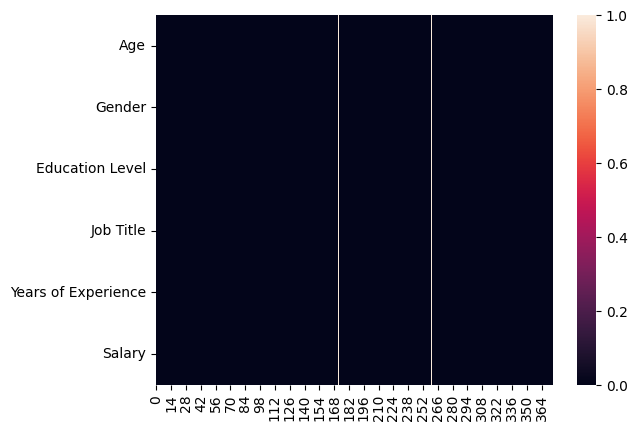

In [17]:
import seaborn as sns
sns.heatmap(df.isna().transpose())

In the dataset 2 rows contains all missing data

# Missing data handling techniques:
* Droping :
    * rows: if the dependent variable or target or label is missing we drop the row or if we have harge data and few rows are missing we can them but keep in mind that it should not bias on data
    * columns : If a column contains more than 70% data missing we generally drop the columns. It is not a hard and fast rule.
* Impute:(fill in missing data)
    * mean: we can fill the value of missing data using mean if the data is normally distributed and has no outliers.
    * median: We can fill in the missing data using median if the data is normally distributed and has outliers
    * mode : For categorical data use mode to fill in missing data
* Use ML algorithms to fill in  the missing data
    * MICE
    * IterativeImputer
    * Autoencoders
    * KNN
    * Clustering
* Mathematical Techniques:
    * Interpolation
* Use EDA and fill in missing data using your own logics

In [18]:
# in our case the target salary is missing so we drop the row
df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [19]:
df.dropna(inplace = True)

In [20]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [21]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Here `Age`, `Gender`, `Education Level`, `Job Title`, `Years of Experience` are independent variable and salary is dependent variable we are trying to predict dependent variable `salary` which is continuos data using independet variable. since salary is continuous data the problem is supervised ML regression problem


# Assumption of Linear Regression
There are four assumptions associated with a linear regression model:

* Linearity: The relationship between X and the mean of Y is linear.
* Homoscedasticity: The variance of residual is the same for any value of X.
* Independence: Observations are independent of each other.
* Normality: For any fixed value of X, Y is normally distributed.

In [22]:
# Linearity and independence
df.corr()

<ipython-input-22-ea13ed88ed02>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


<ipython-input-23-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

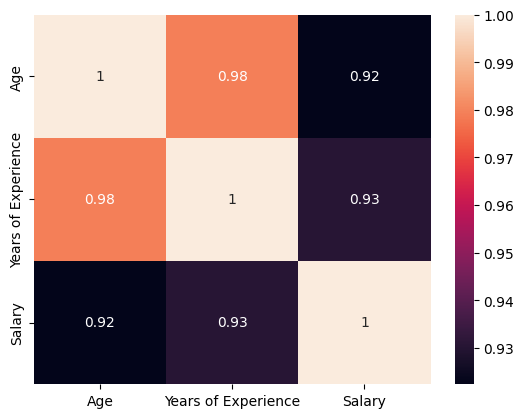

In [23]:
sns.heatmap(df.corr(), annot = True)

* Age and salary are positavely correlated
* Years of Experience and Salary are positavely correlated
* Age and Years of Experience are positavely correlated. These 2 features are independent variable. According to assumption of linear regression `Independence` they should not be correleted. If they are it is is a problem of multi-colinearity. If features suffers from this problem we drop one column.


In [24]:
X = df[['Years of Experience']] # x must be in 2D
y = df.Salary # Y can be in 1 D

# x mai train garey ra x mai test garnu is methodological mistake

# Cross Validation
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called `overfitting`. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, y_train.shape

((298, 1), (298,))

In [27]:
X_test.shape, y_test.shape

((75, 1), (75,))

# Modeling


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate


In [29]:
y_pred = model.predict(X_test)


In [30]:
from sklearn.metrics import mean_squared_error
MSE =mean_squared_error(y_true = y_test, y_pred = y_pred)
MSE

241834883.8999349

In [31]:
from sklearn.metrics import mean_absolute_error
MAE =mean_absolute_error(y_true = y_test, y_pred = y_pred)
MAE

12094.170341194764

If years of experience is 5 what will be the salary

In [32]:
years_of_experience = int (input('Enter your Years of Experience:'))
salary = model.predict([[years_of_experience]]) # x must be in 2D
salary

Enter your Years of Experience:12


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([113392.15972007])

# `coef_` and `intercept_` of model
y = mx + c

In [33]:
model.coef_ # value of m

array([6822.59017499])

In [34]:
model.intercept_ # value of c

31521.077620206008

# Let's visualize fitted line

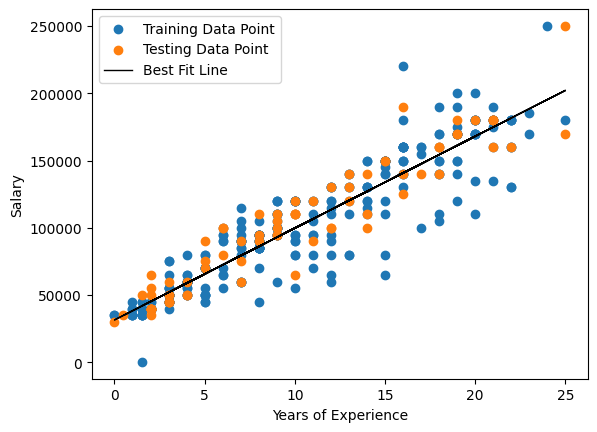

In [35]:
import matplotlib.pyplot as plt

plt.scatter(x = X_train,y = y_train, label ='Training Data Point') # training data
plt.scatter(x = X_test,y = y_test, label ='Testing Data Point') # test data
plt.plot (X_test, y_pred, color= 'black', linewidth = 1, label = "Best Fit Line")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [36]:
model.score(X_test,y_test) # Returns coefficient of determination of the prediction
# yesh lai hami ley accuracy of the prediction ne man nu sakeenxa

0.8991338517367767

In [37]:
 # In Linear Regression the residual should be normally distributed
residual = y_test - y_pred

<Axes: xlabel='Salary', ylabel='Density'>

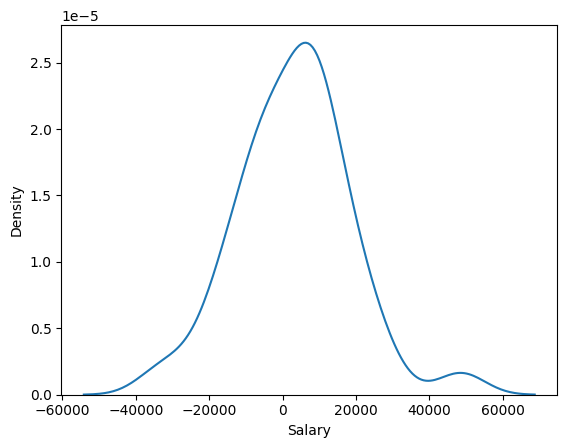

In [38]:
sns.kdeplot(residual)

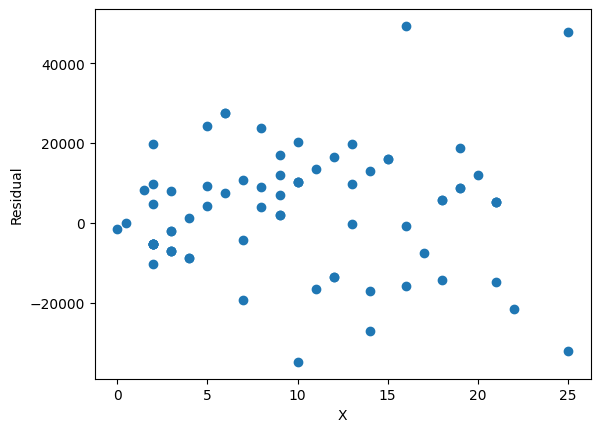

In [39]:
plt.scatter(X_test, residual)
plt.xlabel('X')
plt.ylabel('Residual')
plt.show()
# yo vision ma hami ley 0 ko xeu ma dherai va a ko ley normal distribution xa

# Multiple Linear Regression

In [40]:
import pandas as pd
df = pd.read_csv('/content/Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [41]:
df.dropna(inplace=True) # dropping the empty values

<Axes: xlabel='Education Level', ylabel='Salary'>

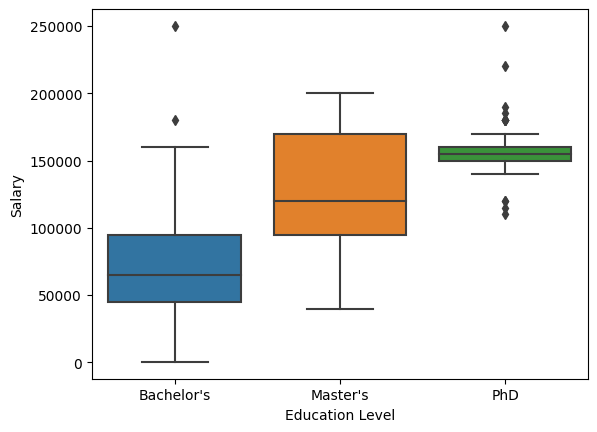

In [42]:
import seaborn as sns
sns.boxplot(x = 'Education Level', y= 'Salary', data = df)

In [43]:
df.groupby('Education Level').Salary.median()

Education Level
Bachelor's     65000.0
Master's      120000.0
PhD           155000.0
Name: Salary, dtype: float64

On average Person with Bachelor's degree has salary = 65000.0, master's degree = 120000.0 abd PhD = 155000 \\
It means Degree affects salary.

In [44]:
X = df[['Years of Experience', 'Education Level']] # X are always on 2D
y = df.Salary

In [45]:
X.head()

,Years of Experience,Education Level
0,5.0,Bachelor's
1,3.0,Master's
2,15.0,PhD
3,7.0,Bachelor's
4,20.0,Master's


Generally, we use OneHotEncoding in linear models over level encoding. \\
In tree based models level encoding is preferred.

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [47]:
transformer = ColumnTransformer(
    transformers = [('one_hot_encoder', OneHotEncoder(), ['Education Level'])],
    remainder = 'passthrough'
)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
pipe = Pipeline([('transformer', transformer), ('model', LinearRegression())])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [50]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Education Level'])])),
                ('model', LinearRegression())])

In [51]:
pipe.score(X_test, y_test)

0.9027498730083701

In [52]:
y_pred = pipe.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error
MSE =mean_squared_error(y_true = y_test, y_pred = y_pred)
MSE

233165175.58398533

In [54]:

from sklearn.metrics import mean_absolute_error
MAE =mean_absolute_error(y_true = y_test, y_pred = y_pred)
MAE

10699.551743554708

In [55]:
yoe = int(input("enter years of experience"))
degree = input("enter years of degree Among Bachelor's, Master's and PhD")
test_data = pd.DataFrame([[yoe, degree]], columns = ['Years of Experience', 'Education Level'])
pipe.predict(test_data)

enter years of experience21
enter years of degreePhD


array([181550.56492848])